# Принятие решений в бизнесе - гипотезы для увеличения выручки. А/В-тест.

## Описание проекта

Аналитик крупного интернет-магазина вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Задача проекта - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 


### [Часть 1. Приоритизация гипотез.](#part1)

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


•	[Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.](#ice)

•	[Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.](#rice)

•	[Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.](#conclusions)


### [Часть 2. Анализ А/В-теста.](#part2)

Был проведен A/B-тест и получены результаты, которые описаны в файлах orders.csv и visitors.csv.

Проанализировать A/B-тест:

1.	[Построить график кумулятивной выручки по группам. Сделать выводы и предположения.](#1)

2.	[Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.](#2)

3.	[Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.](#3)

4.	[Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.](#4)

5.	[Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.](#5)

6.	[Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.](#6)

7.	[Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.](#7)

8.	[Построить точечный график стоимостей заказов. Сделать выводы и предположения.](#8)

9.	[Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.](#9)

10.	[Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным. Сделать выводы и предположения.](#10)

11.	[Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.](#11)

12.	[Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным. Сделать выводы и предположения.](#12)

13.	[Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.](#13)

14.	[Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.](#15)


### Описание данных

#### Данные для первой части

Файл /datasets/hypothesis.csv. 

•	Hypothesis — краткое описание гипотезы;

•	Reach — охват пользователей по 10-балльной шкале;

•	Impact — влияние на пользователей по 10-балльной шкале;

•	Confidence — уверенность в гипотезе по 10-балльной шкале;

•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части

Файл /datasets/orders.csv. 

•	transactionId — идентификатор заказа;

•	visitorId — идентификатор пользователя, совершившего заказ;

•	date — дата, когда был совершён заказ;

•	revenue — выручка заказа;

•	group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

•	date — дата;

•	group — группа A/B-теста;

•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


<a id='part1'>
    
### Часть 1. Приоритизация гипотез.
</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
sns.set(style='whitegrid')
sns.set_palette('Set2')
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

In [2]:
data = pd.read_csv('.csv', sep=',')
data.columns = data.columns.str.lower()

In [3]:
data.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<a id='ice'>
Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
</a>

Применим фреймворк ICE для приоризации гипотез.

Отсортируем гипотезы по убыванию приоритета.

In [4]:
data['ICE'] = round((data['impact'] * data['confidence'])/data['efforts'], 2)
data.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<a id='rice'>
Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
</a>

Применим фреймворк RICE для приоритации гипотез.

Отсортируем их по убыванию приоритета.

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence'])/data['efforts']
data.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<a id='conclusions'>
Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
</a>

По фреймворку ICE наиболее приоритетными гипотезами были:

1. Запустить акцию, дающую скидку на товар в день рождения;

2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;

3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.


По фреймворку RICE наиболее приоритетными гипотезами были:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;

2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;	

3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.


Фреймворк RICE учитывает параметр reach (охват пользователь по 10-бальной шкале - сколько пользователей затронет изменение, которое мы хотим внести), поэтому изменилась приоритизация гипотез - на первые места вышли гипотезы с наибольшим охватом пользователей.

<a id='part2'>
    
### Часть 2. Анализ А/В-теста.
</a>

Загрузим данные и подготовим их к анализу.

In [6]:
orders = pd.read_csv('orders_1.csv')

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Переведем столбец с датой в тип даты.

In [8]:
orders['date'] = orders['date'].map(lambda x:dt.datetime.strptime(x,'%Y-%m-%d'))

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Определим максимальную и минимальную дату, подтвердим количество групп А/В-теста.

In [10]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [11]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [12]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Начало теста - 01.08.2019, окончание теста - 31.08.2019. В тесте участвуют 2 группы - А и В.

In [13]:
visitors = pd.read_csv('visitors.csv')

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Переведем столбец с датой в тип даты.

In [15]:
visitors['date'] = visitors['date'].map(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))

In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Определим минимальную и максимальную дату проведения теста. А также подтвердим количество групп в А/В-тесте.

In [17]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [18]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

In [19]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Количество групп - 2 (А и В). Начало теста - 01-08-2019, окончание теста - 31.08.2019.

Проверим не попадаются ли у нас пользователи в обе группы.

In [20]:
orders.groupby('visitorId').agg({'group':'nunique'})

,group
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


Создаем список пользователей с уникальными 'visitorId'.

In [21]:
double_users=orders.groupby('visitorId').agg({'group':'nunique'}).reset_index().query('group>1')['visitorId'].unique()

In [22]:
len(double_users)

58

У нас 58 пользователей, которые попали в обе группы. Удалять их не буду, так как пользователи могли делать разные заказы и и их заказы могли попасть в разные группы А/В-теста, в которые попал заказ. Проверим, не попадают ли у нас заказы в обе группы.

In [23]:
orders.groupby('transactionId').agg({'group':'nunique'})

,group
transactionId,
1062393,1
4919758,1
7210578,1
8131427,1
11068804,1
...,...
4276811111,1
4279408906,1
4281129020,1


In [24]:
double_transaction=orders.groupby('transactionId').agg({'group':'nunique'}).reset_index().query('group>1')['transactionId'].unique()

In [25]:
len(orders['transactionId'])

1197

In [26]:
len(double_transaction)

0

Одни и те же заказы не попадают в разные группы А/В-теста, что подтверждает предположение, что один и тот же пользователь может попасть в обе группы, но с разными заказами, а группа А/В-теста определяется по заказу.

Чтобы построить графики, нужно собрать кумулятивные значения. Объявим датафрейм cumulativeDate со столбцами:

- date -дата;

- group - группа А/В-теста (А или В);

- orders - кумулятивное количество заказов на указанную дату в указанной группе;

- buyers - кумулятивное количествопользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

- revenue - кумулятивная выручка на указанную дату в указанной группе (средний чек);

- visitors - кумулятивное количество посетителей интернет-магазина на указанную дату в определенной группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates().

In [27]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Получаем агрегированные кумулятивные по дням данные о заказах. Получаем агрегированные кумулятивные по дням данные о пользователях. Объединяем кумулятивные данные в одной таблице.

In [28]:
ordersAggregated = datesGroups.apply(lambda x:orders[np.logical_and(orders['date']<= x['date'],orders['group']== x['group'])].agg({'date':'max', 'group': 'max', 'transactionId': 'nunique','visitorId': 'nunique', 'revenue': 'sum'}), axis=1).sort_values(by=['date',  'group'])

visitorsAggregated = datesGroups.apply(lambda x:visitors[np.logical_and(visitors['date']<= x['date'],visitors['group']== x['group'])].agg({'date':'max', 'group': 'max',               'visitors':'sum'}),axis=1).sort_values(by=['date',  'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [29]:
len(cumulativeData)

62

Применим агрегирующие функции и найдем сколько всего посетителей и заказов было в каждой группе.

In [30]:
new_data=cumulativeData.groupby('group', as_index=False).agg({'visitors':'sum', 'orders':'sum'})
new_data

,group,visitors,orders
0,A,305673,9229
1,B,307092,10466


Найдем отношение числа заказов к количеству пользователей в каждой группе.

In [31]:
new_data['ordersToVisitorsRatio']=(new_data['orders']/new_data['visitors']).map(lambda x:"{0:.4f}".format(x))
new_data

,group,visitors,orders,ordersToVisitorsRatio
0,A,305673,9229,0.0302
1,B,307092,10466,0.0341


Отношение заказов к посетителям в группе В значительно выше, чем в группе А.

<a id='1'>
Посторим графики кумулятивной выручки по дням и группам А/В-тестирования.
</a>

Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах А и В.

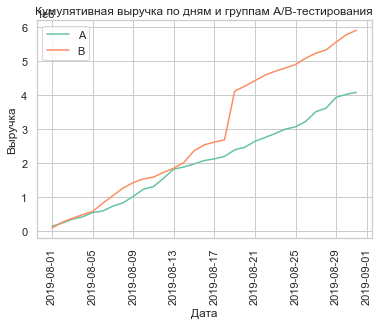

In [32]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

cumulativeRevenueB =cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по дням и группам А/В-тестирования')
plt.legend()
plt.xticks(rotation=90)
plt.show()

В середине теста сегмент В вырвался вперед. Вероятно, на результат теста влияют аномально большие заказы, что нужно учесть в результате.

<a id='2'>
Построим графики кумулятивного среднего чека по дням по группам.
</a>

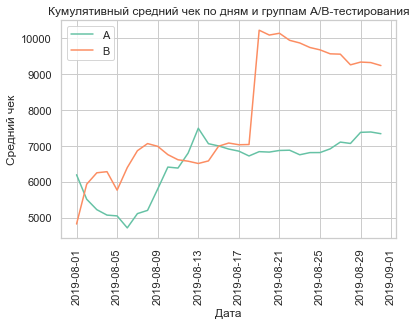

In [33]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по дням и группам А/В-тестирования')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Аналогично предыдущему графику у сегмента В подскочил кумулятивный средний чек, который и дальше продолжает колебаться.

<a id='3'>
Построим график относительного изменения кумулятивного среднего чека группы В к группе А.
</a>

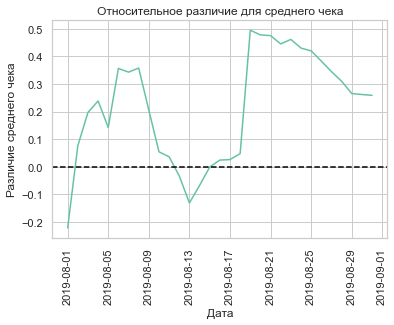

In [34]:
mergedCumulativeRevenue=cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Различие среднего чека')
plt.title('Относительное различие для среднего чека')
plt.xticks(rotation=90)
plt.show()

В нескольких точках график относительного изменения кумулятивного среднего чека резко "скачет", видимо, были аномальные заказы. Большей частью график расположен выше 0.

<a id='4'>
Построим график кумулятивной конверсии по группам.
</a>

Добавим в cumulativeData столбец 'conversion' с отношением числа заказов к количеству пользователей в указанной группе в указанный день. Объявим переменные cumulativeDateA и cumulativeDateB, в которых сохраним данные о заказах в группах А и В соответственно.

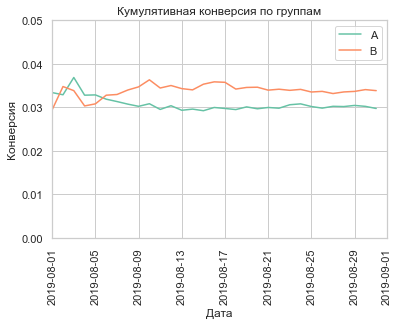

In [35]:
cumulativeData['conversion']=cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA=cumulativeData[cumulativeData['group']=='A']

cumulativeDataB=cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')

plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Кумулятивная конверсия по группам')
plt.xticks(rotation=90)
plt.show()

В начале теста сегмент А имел большую конверсию, затем упал и установился примерно у одного значения. Сегмент В вырос выше А и тоже установился в пределах одного значения.

<a id='5'>
Построим график относительного изменения кумулятивной конверсии по группам.    
</a>

Объединим таблицы cumulativeDataA и cumulativeDataB методом merge(). Построим график относительного различия кумулятивной конверсии группы А к группе В.

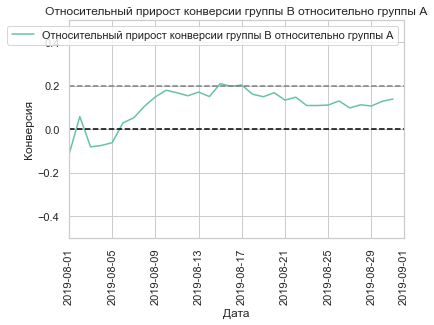

In [36]:
mergedCumulativeConversions=cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label='Относительный прирост конверсии группы В относительно группы А')

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')

plt.axhline(y=0.2, color='grey', linestyle='--')

plt.axis(["2019-8-1", '2019-9-1', -0.5, 0.5])
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Относительный прирост конверсии группы В относительно группы А')
plt.xticks(rotation=90)
plt.show()

Группа В опережает группу А почти с начала тестирования. Прирост примерно 15%. Однако, нельзя утверждать, что данные фиксируются на определеннем уровне.

<a id='6'>
Построим точечный график количества заказов по пользателям.
</a>

In [37]:
ordersByUsers = (orders.groupby('visitorId', as_index=False)
                 .agg({'transactionId': 'nunique'})
                )
ordersByUsers.columns =['visitorId', 'orders'] 
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


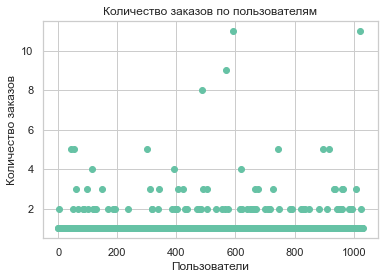

In [38]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')
plt.show()

Пользователи, которые сделали более двух заказов, встречаютсч редко. Для того, чтобы выяснить, имеют ли место аномалии в данном случае, считаем 95-й и 99-й перцентили количества заказов на пользователя.

<a id='7'>
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
</a>

In [39]:
ordersByUsers.sort_values(by='orders',ascending=False).head(10)
np.percentile(ordersByUsers['orders'],[95,99])

array([2., 4.])

Не более 5% пользователей оформляли больше двух заказов и только 1% пользователей - более четырёх.

<a id='8'>
Построим точечный график стоимости заказов.
</a>

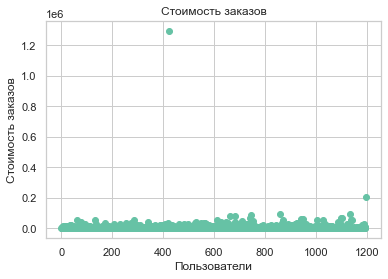

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title('Стоимость заказов')
plt.show()

Есть аномальные выбросы со значением более 1250000 и 200000.

<a id='9'>
Посчитаем 95-й и 99-й перцентили стоимости заказов.
</a>

In [41]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [42]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


Не более 5% пользователей оформили заказы на сумму 28000 и 1% - на сумму более 58233.

<a id='10'>
Посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным.
</a>

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами visitorId и transactionId, где для пользователей, совершивших хотя бы один заказ, будет указано количество заказов.

Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов - нули. Посчитаем статистическую значимость различия среднего количества заказов. 

Для расчета p-value используем непараметрический тест Манна-Уитни, так как есть выбросы , а тест работает с рангами, не учитывая значения.

Сформулируем нулевую и альтернативную гипотезу:

Н0: Статистическая значимость в количестве заказов и среднем чеке не значительна и сделать вывод о различии нельзя.

Н1: Статистическая значимость в количестве заказов и среднем чеке значительна и между выборками имеется статистическая значимость.

Порогом статистической значимости установим alpha=.05

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value - уровень значимости составляет:', stats.mannwhitneyu(sampleA, sampleB)[1])

print('Относительный прирост среднего группы В относительно группы А составляет:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 


P-value - уровень значимости составляет: 0.016792355056752608
Относительный прирост среднего группы В относительно группы А составляет: 0.138


In [44]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


P-value значительно меньше 0.05, значит, нужно отвергнуть нулевую гипотезу. Анализ "сырых данных" показывает, что в среднем количестве заказов между группами есть статистически значимые различия.

Относительный прирост среднего группы В к конверсии группы А равен 13.8%.

<a id='11'>
Посчитаем статистическую значимость различий в среднем чеке по "сырым данным".
</a>

Сравним средние чеки по "сырым данным" и рассмотрим данные без выбросов.

In [45]:
print('P-value','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия между чеками:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value 0.729
Относительные различия между чеками: 0.259


P-value значительно больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Относительное различие между чеками около 26%.

<a id='12'>
Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по "очищенным данным".
</a>

Очистим данные от аномальных значений. 95-й и 99-й перцентили средних чеков равны 28000 и 58233 руб. 95-й и 99-й перцентили числа заказов на одного пользователя - 2 и 4 заказа на пользователя. Будем считать аномалиями пользователей, которые сделал 4 и более заказов, или сделал заказ на сумму более 30000 руб. Т.е. мы убираем 1% пользователей с 4 и более заказами и от 1% до 5% заказов с самой большой стоимостью. Сделаем срезы, объединим в таблицу.

In [46]:
max_orders =  int(np.percentile(orders['transactionId'], [95]))
max_revenue = int(np.percentile(orders['revenue'], [95]))

In [47]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > max_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['userId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['visitorId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.019
0.120


Сегмент В лучше сегмента А, статистическая значимость достигнута, так же как и в случае с "сырыми данными".

<a id='13'>
Посчитаем статистическую значимость различия в среднем чеке заказа между группами после удаления "аномальных значений."
</a>

In [49]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.863
-0.013


P-value увеличился, но разница между сегментами сократилась с 26% до -17%. В данных стало меньше шума после удаления выбросов.

<a id='14'>
Выводы и принятие решения по тесту.    
</a>

### Выводы:

*Есть статистически значимое различие по конверсии по "сырым данным" и после удаления выбросов между группами А и В.*

*Нет статистически значимого различия по среднему чеку между группами А и В, как по "сырым данным", так и после удаления выбросов.*

*График различия среднего чека дал возможность выявить аномалии. Но он колеблется и не позволяет на его основе сделать определенные выводы.*

*График различия конверсии между группами А и В показывает, что результаты группы В лучше, есть тенденции к росту, либо зафиксировались около среднего значения.*

*Возможно остановить тест, признав лучшими результаты группы В.*


